<a href="https://colab.research.google.com/github/okana2ki/ML/blob/main/NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.ニューラルネットワーク

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import keras
import tensorflow as tf

###学習用ディレクトリの作成（Colab内に一時的にデータを置く場合）←Google Driveを使用するときは不要
./content/trainに学習用データとして使用する画像を格納するディレクトリを作成します。（このコードでは、USA・Italy・Australiaのディレクトリを作成しています。）


In [2]:
# Colab内にディレクトリを作成

#ラベルUSAのディレクトリを作成
DIR = "train/USA/"
# DIRの名称のディレクトリがなければ作成
if not os.path.exists(DIR):
    os.makedirs(DIR)

#ラベルItalyのディレクトリを作成
DIR = "train/Italy/"
# DIRの名称のディレクトリがなければ作成
if not os.path.exists(DIR):
    os.makedirs(DIR)

#ラベルAustraliaのディレクトリを作成
DIR = "train/Australia/"
# DIRの名称のディレクトリがなければ作成
if not os.path.exists(DIR):
    os.makedirs(DIR)

### 学習用データの作成

Colab内に一時的に置く場合は、ディレクトリが作成されたことを確認後、手動で該当する学習用の画像データをディレクトリにアップロードし、読み込みます。 （このコードでは、学習用データとしてUSA・Italy・Australiaの画像を使用します。）

Google Drive中のデータを使う場合は、Google Driveをマウントし、そこから読み込む。

In [3]:
# データパスの設定
# data_path = './train'  # Colab内に一時的に置いた場合
data_path = '/content/drive/MyDrive/Colab_files/train'  # Google Driveに置いた場合：置いたディレクトリに応じて適宜書き換え

# 学習用のデータを作る.
image_list = []
label_list = []

for dir in os.listdir(data_path):
    # dataset_path = data_path + dir
    dataset_path = os.path.join(data_path, dir)
    label = -1

    # USAはラベル0
    if dir == "USA":
        label = 0
    # Italyはラベル1
    elif dir == "Italy":
        label = 1
    # Australiaはラベル2
    elif dir == "Australia":
        label = 2


    for file in os.listdir(dataset_path):
        # 配列label_listに正解ラベルを追加(USA:0 Italy:1 Australia:2)
        label_list.append(label)
        filepath = os.path.join(dataset_path, file)
        print(filepath)
        image = Image.open(filepath)
        image = image.resize((500, 500), Image.BICUBIC)
        image = np.asarray(image)
        image_list.append(image / 255.)

# kerasに渡すためにnumpy配列に変換。
train_data = np.array(image_list)
train_label = np.array(label_list)

/content/drive/MyDrive/Colab_files/train/Italy/イタリアーアマルフィ海岸 (1).jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーカテドラーレ大聖堂.jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアートリノスペルガ聖堂.jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーアマルフィ海岸.jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアートレビの泉.jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーコロッセオ.jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアードロミテ.jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーアルベロベッロのトゥルッリ .jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーフィレンツェ歴史地区.jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーヴェナリーア宮殿.jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーパンテオン神殿.jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーマテーラ.jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーヴェネツィア (1).jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーピサのドゥオモ広場 (1).jpg
/content/drive/MyDrive/Colab_files/train/Italy/イタリアーバチカン市国.jpg
/content/d

画像の1つを確認のために表示します。

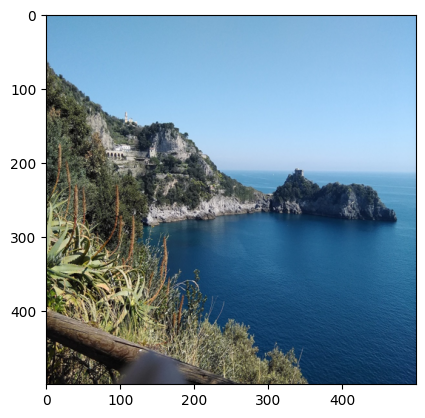

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(train_data[3])

In [19]:
train_data.shape

(37, 500, 500, 3)

In [20]:
train_label.shape

(37,)

In [21]:
print(train_label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2]


### モデルの作成

In [5]:
#train.data.shapeがinput_shape
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3, 3),
                                                    input_shape=(500, 500, 3), activation="relu"),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512),
                             tf.keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 32)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 484128)            0         
                                                                 
 dense (Dense)               (None, 512)               2

In [7]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [8]:
#モデルの学習
np.random.seed(1)
tf.random.set_seed(2)
model.fit(train_data, train_label, epochs=20)

Epoch 1/20
2/2 [==============================] - 8s 997ms/step - loss: 54.9243 - accuracy: 0.1351
Epoch 2/20
2/2 [==============================] - 0s 92ms/step - loss: 56.0177 - accuracy: 0.6216
Epoch 3/20
2/2 [==============================] - 0s 91ms/step - loss: 69.3665 - accuracy: 0.5405
Epoch 4/20
2/2 [==============================] - 0s 90ms/step - loss: 87.4236 - accuracy: 0.5676
Epoch 5/20
2/2 [==============================] - 0s 100ms/step - loss: 29.9669 - accuracy: 0.3784
Epoch 6/20
2/2 [==============================] - 0s 89ms/step - loss: 9.1846 - accuracy: 0.5135
Epoch 7/20
2/2 [==============================] - 0s 92ms/step - loss: 5.7492 - accuracy: 0.7297
Epoch 8/20
2/2 [==============================] - 0s 87ms/step - loss: 7.6307 - accuracy: 0.6757
Epoch 9/20
2/2 [==============================] - 0s 94ms/step - loss: 0.0729 - accuracy: 0.9730
Epoch 10/20
2/2 [==============================] - 0s 89ms/step - loss: 4.7845e-04 - accuracy: 1.0000
Epoch 11/20
2/2 [=

In [11]:
#学習したモデルをファイルに保存
# model.save("world_heritage.h5")
model.save('/content/drive/MyDrive/Colab_files/my_model.keras')

In [12]:
#保存したファイルの読み込み
# model_loaded = tf.keras.models.load_model("world_heritage.h5")
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Colab_files/my_model.keras')

### テスト用ディレクトリの作成
テスト用画像を格納するために、./testに抽出したい国の名前のディレクトリを作成します。
 （このコードでは、./testの下にAustraliaのディレクトリを作成します。）

In [ ]:
# Colab内にディレクトリを作成
DIR = "test/Australia"
# DIRの名称のディレクトリがなければ作成
if not os.path.exists(DIR):
    os.makedirs(DIR)

### テスト用データの作成
ディレクトリが作成されたことを確認後、手動でテスト用の画像データをアップロードし、読み込みます。
./test/Australiaに、読み込ませたい画像データをアップロードします。 （このコードでは、テスト用画像データの中からAustraliaの画像の抽出を試みます。）

In [ ]:
# テスト用のデータを作る。
image_list = []

# ./data/test 以下のディレクトリの画像を読み込む。
for dir in os.listdir("./train"):

    dataset_path = "./train/" + dir
    label = -1

    # USAはラベル0
    if dir == "USA":
      label = 0

    # Italyはラベル1
    elif dir == "Italy":
      label = 1

    # Australiaはラベル2
    elif dir == "Australia":
      label = 2

    for file in os.listdir(dataset_path):
      # 配列label_listに正解ラベルを追加(USA:0 Italy:1 Australia:2)
      label_list.append(label)
      filepath = dataset_path + "/" + file
      print(filepath)
      image = Image.open(filepath)
      image = image.resize((500, 500), Image.BICUBIC)
      image = np.asarray(image)
      image_list.append(image / 255.)

# kerasに渡すためにnumpy配列に変換。
test_data = np.array(image_list)
test_label = np.array(label_list)

/content/img/test/Australia/オーストラリアーオペラハウス.jpg
/content/img/test/Australia/イタリアーヴェネツィア (1).jpg
/content/img/test/Australia/イタリアーピサのドゥオモ広場.jpg
/content/img/test/Australia/オーストラリアー　グレートバリアリーフ.jpg
/content/img/test/Australia/USA-自由の女神 - コピー.png
/content/img/test/Australia/エジプトーギザのピラミッド.jpg


In [ ]:
#正解率
pred = model_loaded.predict_classes(test_data)
(pred == test_label).sum() / len(test_label)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.3333333333333333

### 実行結果

In [ ]:
label_names = ["USA","Italy","Australia"]

correct_data = test_data[pred == test_label]
correct_label = pred[pred == test_label]
count_correct=len(correct_label)
print(count_correct)

2


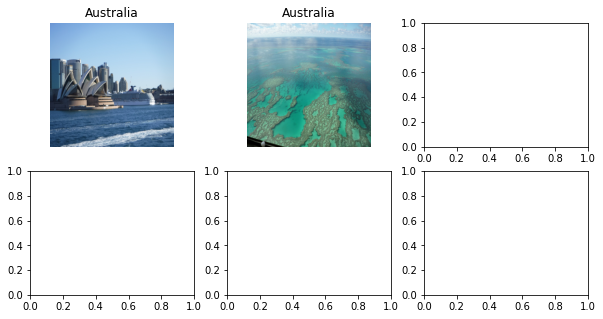

In [ ]:
#正解した画像を表示
flg, axes = plt.subplots(2, 3, figsize=(10, 5))

for i in range(count_correct):
  ax = axes[i // 3][i % 3]
  ax.set_title(label_names[correct_label[i]])
  ax.axis("off")
  ax.imshow(correct_data[i])

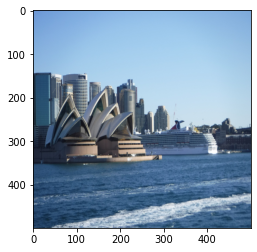

In [ ]:
plt.imshow(correct_data[0])